**1. Распределение Релэя**

*Используя NumPy*

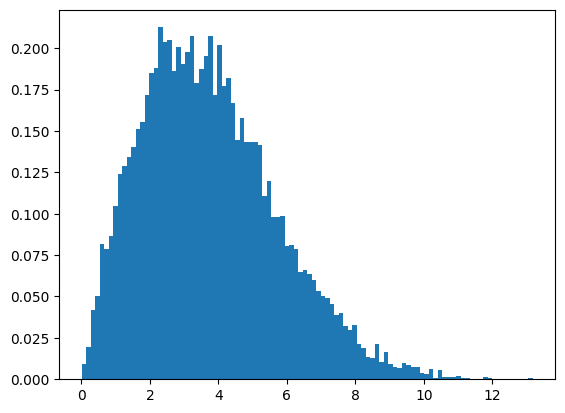

In [32]:
from matplotlib.pyplot import hist
import numpy as np

values = hist(np.random.rayleigh(3, 10000), bins=100, density=True)

*Используя SciPy*

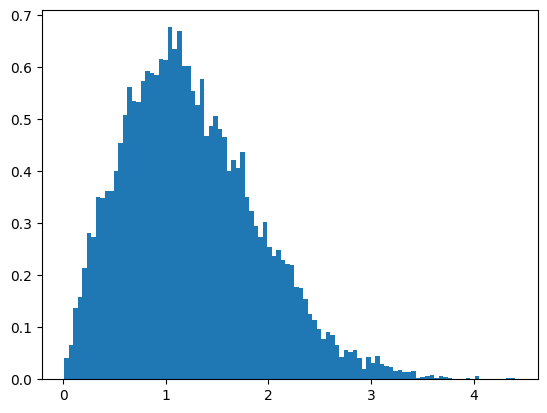

In [33]:
from scipy.stats import rayleigh
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
r = rayleigh.rvs(size=10000)

ax.hist(r, bins=100 ,density=True, histtype='stepfilled')
plt.show()

**2. Построение графика по функции**

Для построения графика была дана функция:

$(x^2 + y^2 - 1)^3 - x^2 y^3 = 0$

Для того, чтобы можно было построить график, требуется преобразовать функцию.

$(x^2 + y^2 - 1)^3 = x^2 y^3$

$x^2 + y^2 - 1 = x^{2/3} * y$

$y^2 -x^{2/3} * y + x^2 - 1 = 0$

Находим $y$ как корни этого квадратного уравнения. Корни квадратного уравнения считаются по формуле:

$y_{1, 2} = \frac{- b \pm \sqrt{D}}{2a}$, где $D = b^2 - 4ac$ - дискриминант квадратного уравнения; $a$, $b$ и $c$ - коэффиценты квадратного уравнения

$a = 1$, $b = - x^{2/3}$, $c = x^2 - 1$

Следовательно корни квадратного уравнения

$y_{1, 2} = \frac{- b \pm \sqrt{b^2 - 4ac}}{2a} = \frac{x^{2/3} \pm \sqrt{x^{4/3} - 4(x^2 - 1)}}{2} = \frac{x^{2/3} \pm \sqrt{x^{4/3} + 4(1 - x^2)}}{2}$

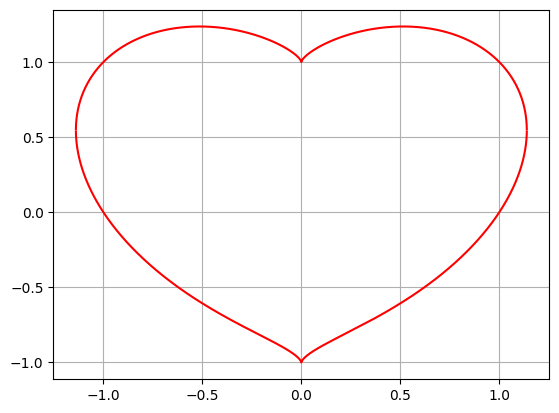

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Create the vectors X and Y
x = np.arange(-2, 2, 0.0001)
y_1 = 0.5 * ((x ** 2) ** (1/3) + ((x ** 4) ** (1/3) + 4 * (1 - x ** 2)) ** (1/2))
y_2 = 0.5 * ((x ** 2) ** (1/3) - ((x ** 4) ** (1/3) + 4 * (1 - x ** 2)) ** (1/2))
# y = 1 / x

# Create the plot
plt.plot(x,y_1, 'r')
plt.plot(x,y_2, 'r')
plt.grid()

# Show the plot
plt.show()

**3. Анализ зависимостей**

*Подготовка массивов*

In [39]:
import matplotlib.pyplot as plt
import numpy as np
age, sex, bmi, children, smoke, region, insurance = [], [], [], [], [], [], []

sex_dict = {'male':'1', 'female':'0'}
smoke_dict = {'yes':'1', 'no':'0'}
region_dict = {'northwest':'0', 'northeast':'1', 'southwest':'2', 'southeast':'3'}

with open('dataset_home.txt', 'r') as file:
    for person in file.readlines():
        for i,name in enumerate([age, sex, bmi, children, smoke, region, insurance]):
            name.append(person.split(',')[i])

age = np.array(age).astype(np.int)
sex = np.array([k.replace(k,sex_dict[k]) for k in sex]).astype(np.int)
bmi = np.array(bmi).astype(np.float)
children = np.array(children).astype(np.int)
smoke = np.array([k.replace(k,smoke_dict[k]) for k in smoke]).astype(np.int)
region = np.array([k.replace(k,region_dict[k]) for k in region]).astype(np.int)
insurance = np.array(insurance).astype(np.float)



*Построение графиков*

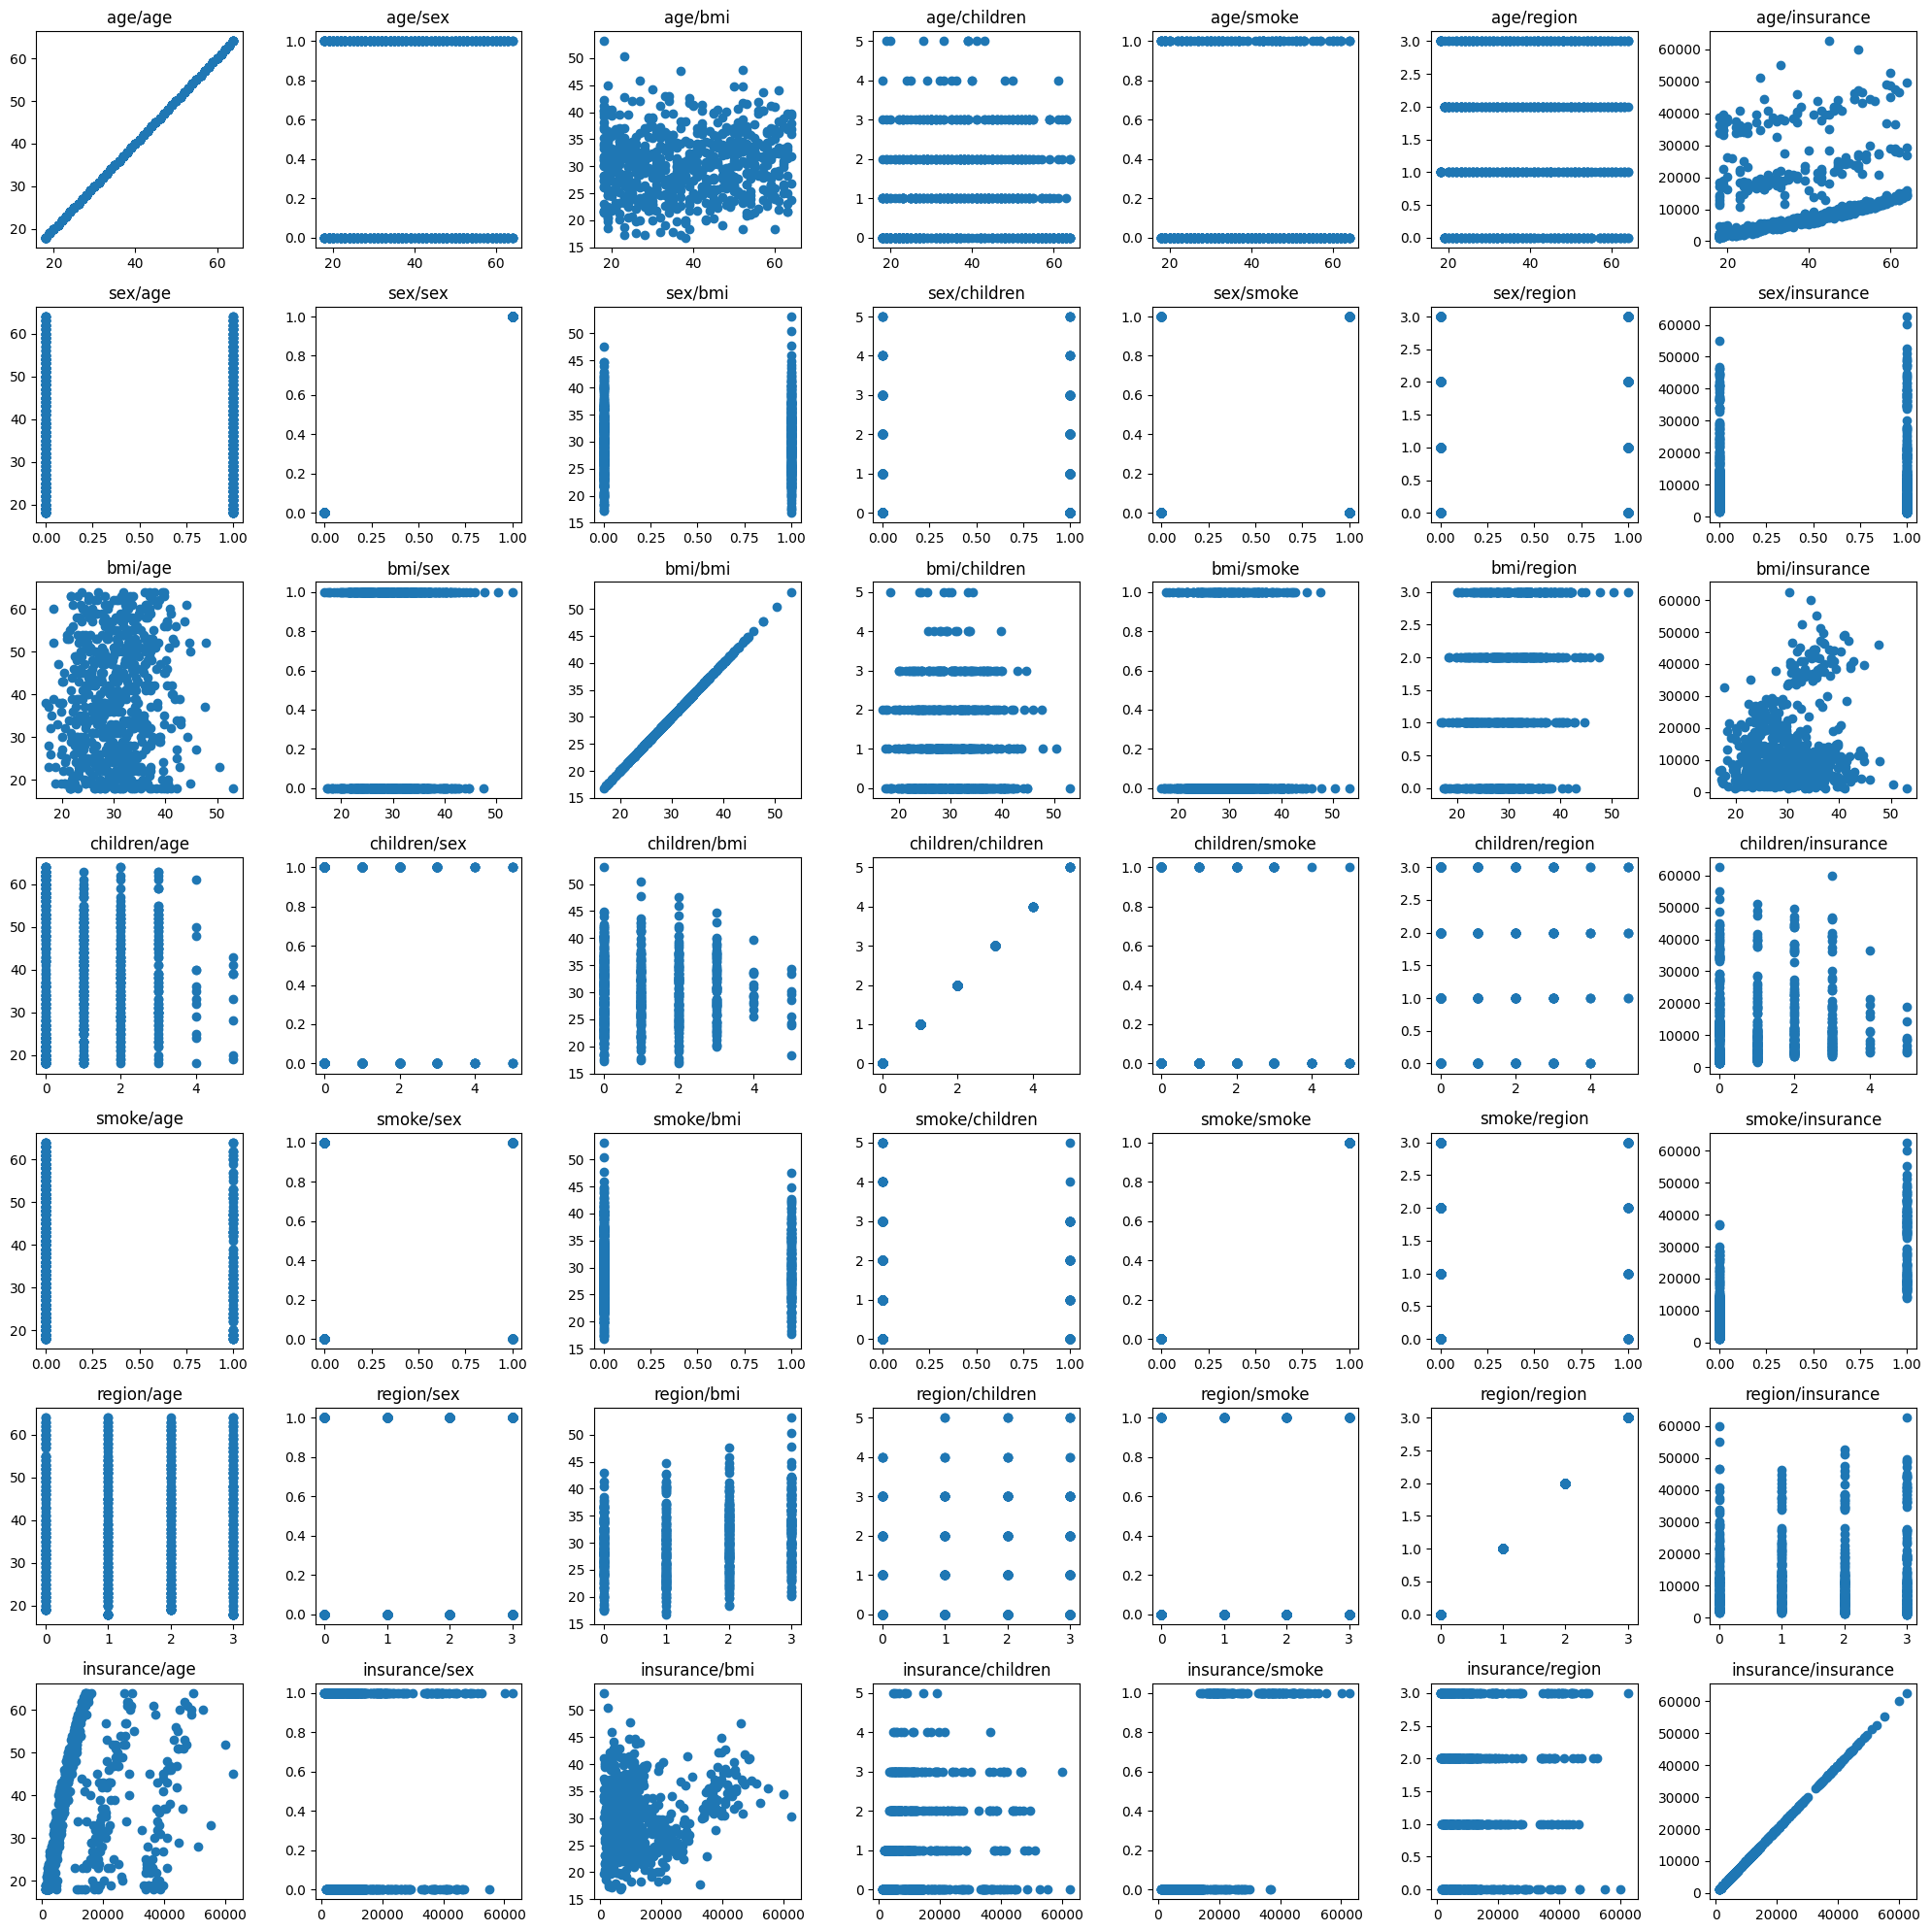

In [40]:
list_of_arrays = [age, sex, bmi, children, smoke, region, insurance]
fig, axs = plt.subplots(len(list_of_arrays), len(list_of_arrays))

for i in range(len(list_of_arrays)):
    i_name = [ k for k,v in locals().items() if v is list_of_arrays[i]][0] 
    for j in range(len(list_of_arrays)):
        j_name = [ k for k,v in locals().items() if v is list_of_arrays[j]][0] 
        axs[i, j].scatter(list_of_arrays[i], list_of_arrays[j])
        axs[i, j].set_title(i_name + '/' + j_name)

fig.set_figheight(20)
fig.set_figwidth(20)
fig.tight_layout()

По результатам изучения графиков видим, есть есть кластеры в зависимости возраста и страховых плат, а также определенная кластеризация в зависимости страховых взносов и ИМТ. 